# Stroke Prediction - Exploratory Data Analysis 

***I perform comprehensive data analysis based on stroke prediction dataset.*** 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')
df.shape
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


itss tiiiiiimee for our lovely missing values

In [4]:
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count' : missing,
    'Percentage' : missing_pct
})
print(missing_df[missing_df['Missing Count'] > 0])

     Missing Count  Percentage
bmi            201    3.933464


Target distribution


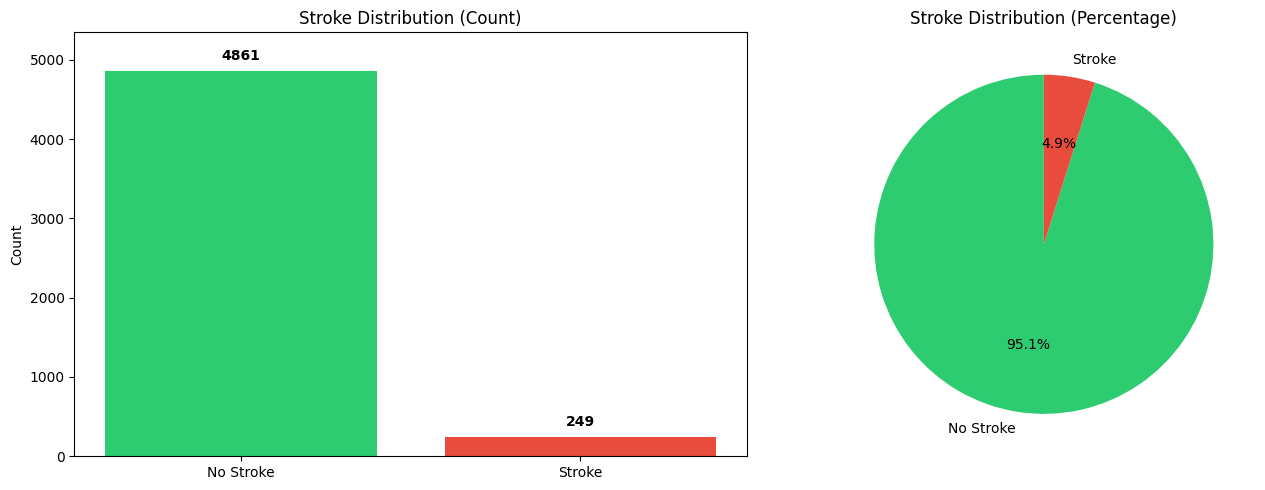

Stroke Rate: {np.float64(4.87279843444227)}


In [5]:
fig,axes = plt.subplots(1,2,figsize = (14,5))
counts = df['stroke'].value_counts()

axes[0].bar(['No Stroke', 'Stroke'], counts.values, color = ['#2ecc71', '#e74c3c'])
axes[0].set_ylabel('Count')
axes[0].set_title('Stroke Distribution (Count)')
axes[0].set_ylim(0,max(counts.values) * 1.1)

for i, v in enumerate(counts.values):
    axes[0].text(i,v + 100,str(v), ha = 'center', va = 'bottom', fontweight = 'bold')

colors = ['#2ecc71','#e74c3c']
axes[1].pie(counts.values, labels = ['No Stroke', 'Stroke'] , autopct = '%1.1f%%', colors = colors, startangle = 90)
axes[1].set_title('Stroke Distribution (Percentage)')

plt.tight_layout()
plt.show()

print('Stroke Rate:' , {(df['stroke'].sum() / len(df) * 100)})

Feature analysis

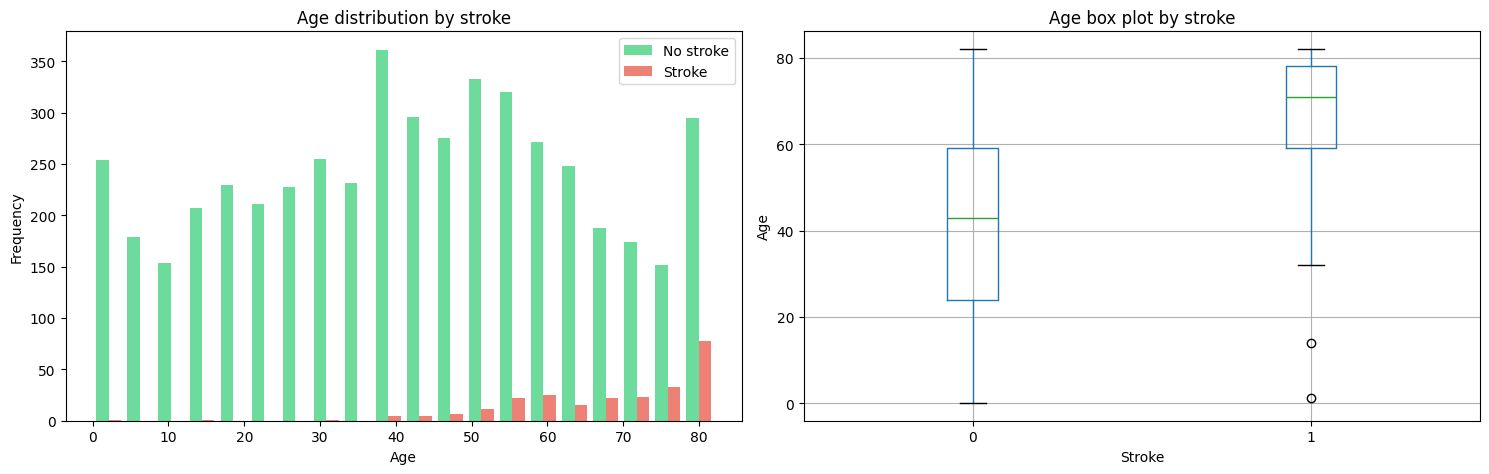

In [6]:
fig,axes = plt.subplots(1,2,figsize = (15,5))

axes[0].hist([df[df['stroke'] == 0]['age'] , df[df['stroke'] == 1]['age']] , label = ['No stroke' , 'Stroke'] , bins = 20 , alpha = 0.7, color = ['#2ecc71', '#e74c3c'])
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Age distribution by stroke')
axes[0].legend()

df.boxplot(column = 'age' , by = 'stroke' , ax = axes[1])
axes[1].set_xlabel('Stroke')
axes[1].set_ylabel('Age')
axes[1].set_title('Age box plot by stroke')

plt.suptitle('')
plt.tight_layout()
plt.show()

another plots on categorical columns

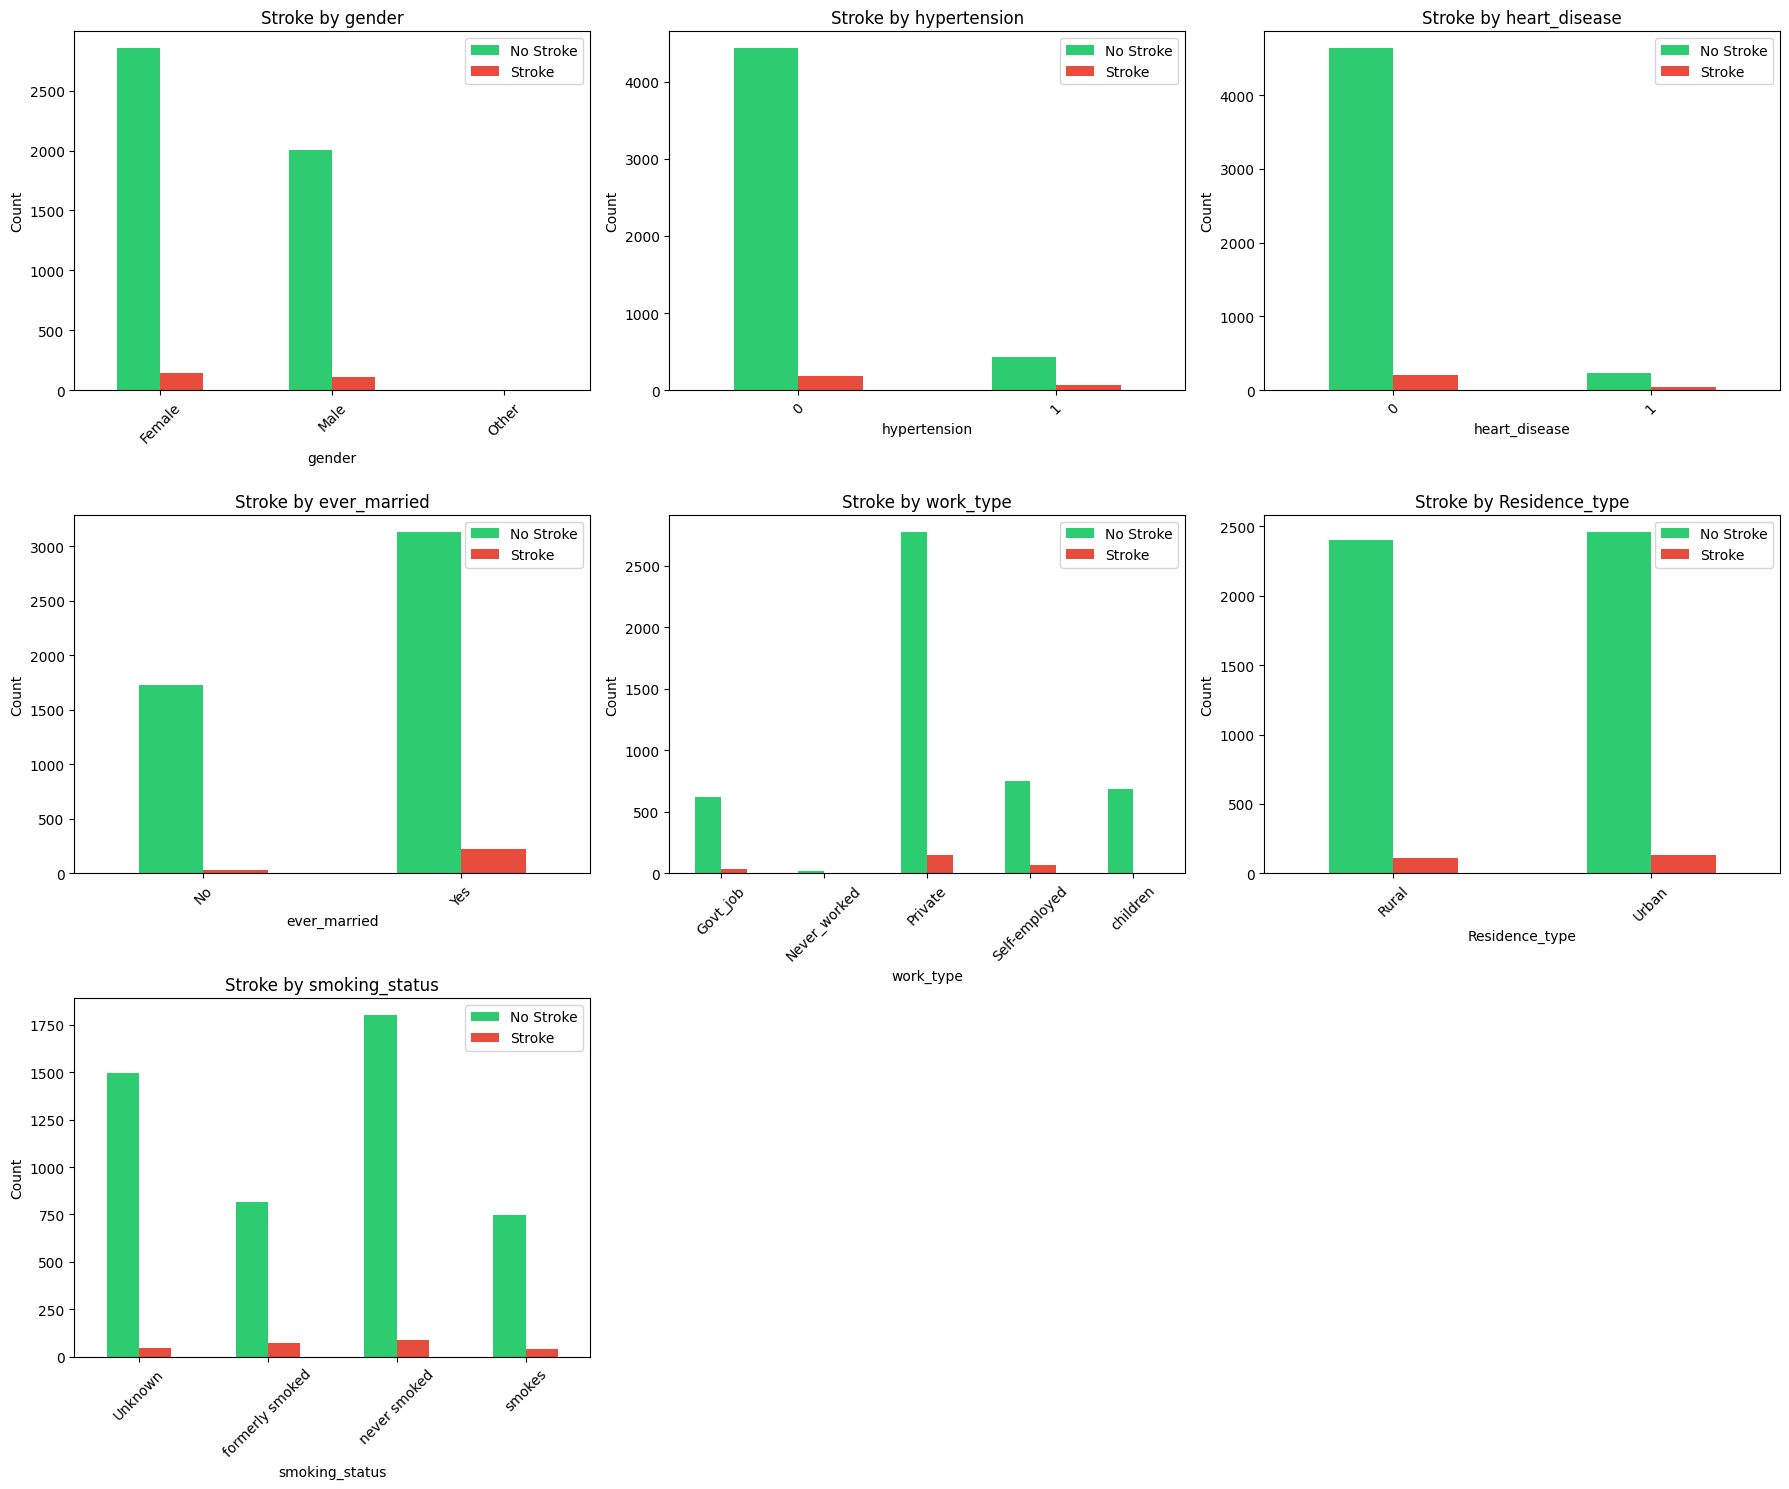

In [7]:
categories = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
fig,axes = plt.subplots(3,3, figsize = (18,15))
axes = axes.ravel()

for idx, col in enumerate(categories):
    if col in df.columns:
        stroke_by_cat = df.groupby([col,'stroke']).size().unstack(fill_value = 0)
        stroke_by_cat.plot(kind = 'bar', ax = axes[idx], color = ['#2ecc71', '#e74c3c'])
        axes[idx].set_title(f'Stroke by {col}')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Count')
        axes[idx].legend(['No Stroke', 'Stroke'])
        axes[idx].tick_params(axis = 'x', rotation = 45)

for idx in range(len(categories),9):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

****Now the main features - BMI and Glucose****

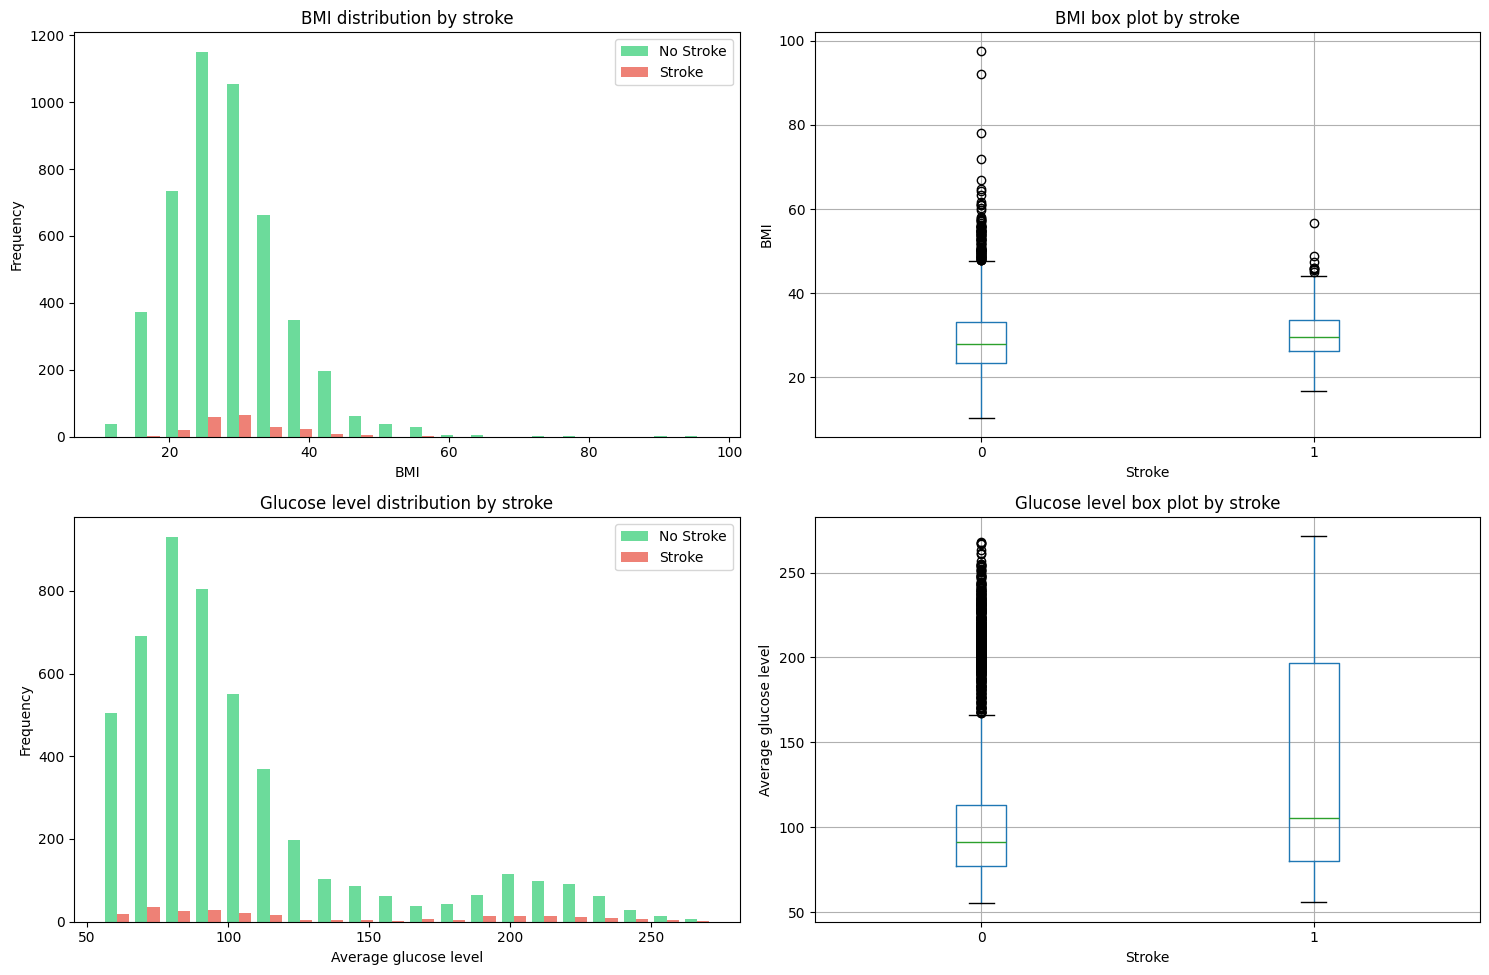

In [8]:
fig , axes = plt.subplots(2,2,figsize = (15,10))

axes[0,0].hist([df[df['stroke'] == 0]['bmi'].dropna() , df[df['stroke'] == 1]['bmi'].dropna()] , label = ['No Stroke','Stroke'], bins = 20, alpha = 0.7, color = ['#2ecc71','#e74c3c'])
axes[0,0].set_xlabel('BMI')
axes[0,0].set_ylabel('Frequency')
axes[0,0].set_title('BMI distribution by stroke')
axes[0,0].legend()

df.boxplot(column = 'bmi', by = 'stroke', ax = axes[0,1])
axes[0,1].set_xlabel('Stroke')
axes[0,1].set_ylabel('BMI')
axes[0,1].set_title('BMI box plot by stroke')
plt.suptitle('')


axes[1,0].hist([df[df['stroke'] == 0]['avg_glucose_level'] , df[df['stroke'] == 1]['avg_glucose_level']] , label = ['No Stroke','Stroke'], bins = 20, alpha = 0.7, color = ['#2ecc71','#e74c3c'])
axes[1,0].set_xlabel('Average glucose level')
axes[1,0].set_ylabel('Frequency')
axes[1,0].set_title('Glucose level distribution by stroke')
axes[1,0].legend()

df.boxplot(column = 'avg_glucose_level', by = 'stroke', ax = axes[1,1])
axes[1,1].set_xlabel('Stroke')
axes[1,1].set_ylabel('Average glucose level')
axes[1,1].set_title('Glucose level box plot by stroke')



plt.suptitle('')
plt.tight_layout()
plt.show()

# Encoding for final exploratary results

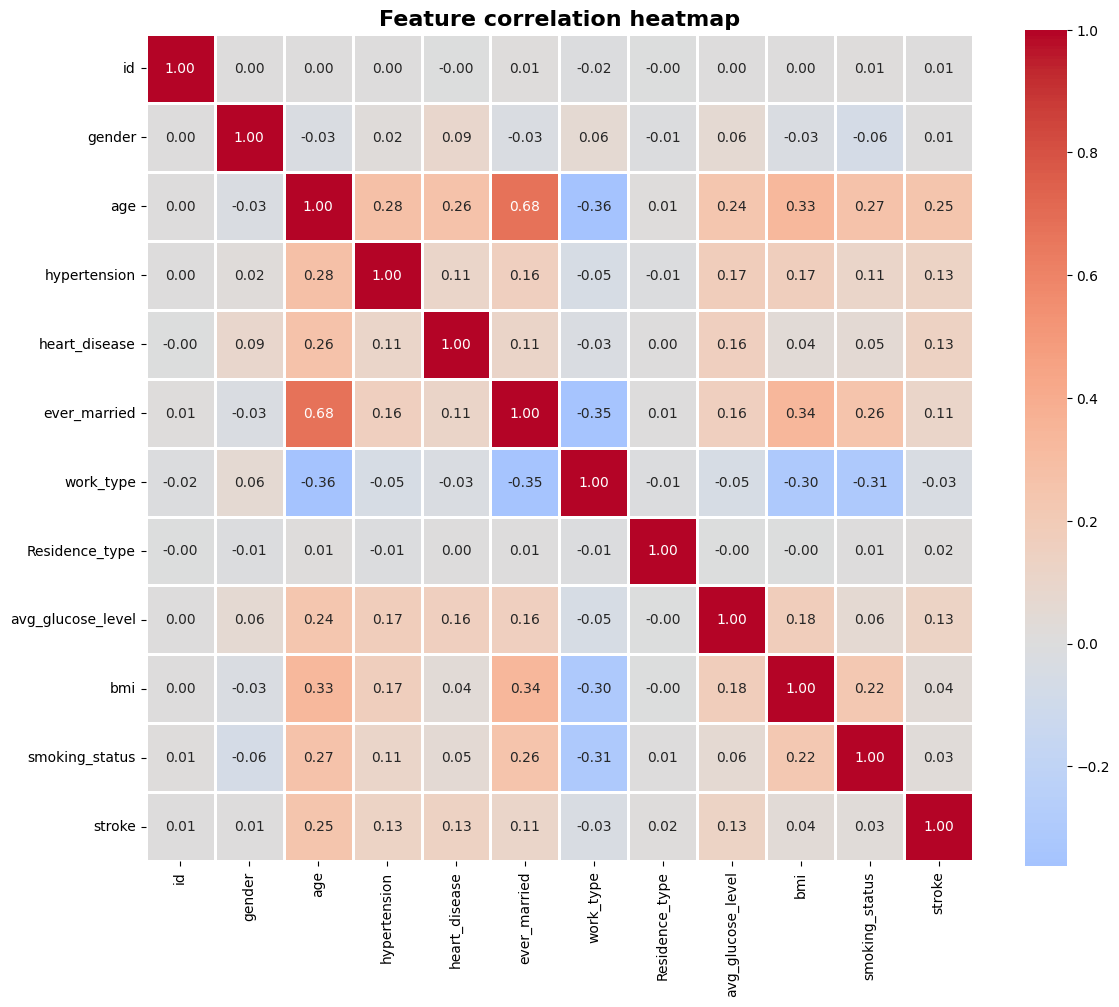

Correlation with Stroke:
stroke               1.000000
age                  0.245257
heart_disease        0.134914
avg_glucose_level    0.131945
hypertension         0.127904
ever_married         0.108340
bmi                  0.042374
smoking_status       0.028123
Residence_type       0.015458
gender               0.008929
id                   0.006388
work_type           -0.032316
Name: stroke, dtype: float64


In [9]:
df_encoded = df.copy()
from sklearn.preprocessing import LabelEncoder

for col in ['gender','ever_married','work_type','Residence_type','smoking_status']:
    if col in df_encoded.columns:
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
correlation = df_encoded.corr()

plt.figure(figsize = (12,10))
sns.heatmap(correlation,annot = True, fmt = '.2f', cmap = 'coolwarm',center = 0, square = True, linewidths = 1)
plt.title('Feature correlation heatmap', fontsize = 16, fontweight = 'bold')
plt.tight_layout()
plt.show()
    
print("Correlation with Stroke:")
print(correlation['stroke'].sort_values(ascending = False))

****Key insights****

In [10]:
avg_age_stroke = df[df['stroke'] == 1]['age'].mean()
avg_age_no_stroke = df[df['stroke'] == 0]['age'].mean()

print("Average age with stroke:" , avg_age_stroke, 'years')
print("Average age without stroke:" , avg_age_no_stroke, 'years')
print("Difference:" , avg_age_stroke - avg_age_no_stroke,'years')


hypertension_stroke_rate = df[df['hypertension'] == 1]['stroke'].mean() * 100
no_hypertension_stroke_rate = df[df['hypertension'] == 0]['stroke'].mean() * 100

print("Stroke rate with hypertension:", hypertension_stroke_rate)
print("Stroke rate without hypertension:" , no_hypertension_stroke_rate)


heart_disease_stroke_rate = df[df['heart_disease'] == 1]['stroke'].mean() * 100
no_heart_disease_stroke_rate = df[df['heart_disease'] == 0]['stroke'].mean() * 100

print("Stroke rate with heart disease:",heart_disease_stroke_rate)
print("Stroke rate without heart disease:",no_heart_disease_stroke_rate)


Average age with stroke: 67.72819277108434 years
Average age without stroke: 41.971544949598844 years
Difference: 25.756647821485494 years
Stroke rate with hypertension: 13.253012048192772
Stroke rate without hypertension: 3.967909800520382
Stroke rate with heart disease: 17.02898550724638
Stroke rate without heart disease: 4.178733967728589


# Conclusion

In this exploratory I reveal that age, hypertension, and heart disease are key risk factors.And you can see there is strong class imbalance and it reuqires special handling.